In [1]:
import ehtim as eh
from astropy.time import Time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Welcome to eht-imaging! v 1.2.4 



In [2]:
mjd_now = Time.now().mjd
print(mjd_now)

60083.827770977245


Loading text image:  ./models/jason_mad_eofn.txt


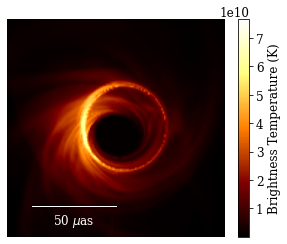

<Figure size 432x288 with 0 Axes>

89.0


In [6]:
# load an image
im = eh.image.load_txt('../models/jason_mad_eofn.txt')
im.mjd = mjd_now
im.display(has_title=False,cbar_unit=['Tb'],label_type='scale');
im.ra = 89.
print(im.ra)

In [7]:
# load an array
arr = eh.array.load_txt('../arrays/EHT2025wTESS.txt')

loaded spacecraft ephemeris ./arrays/ephemeris/TESS


In [8]:
# look at the sites
arr.tarr['site']

array(['PDB', 'PV', 'SMT', 'SMA', 'LMT', 'ALMA', 'SPT', 'APEX', 'JCMT',
       'CARMA', 'KP', 'GLT', 'TESS'], dtype='<U32')

In [9]:
# look at the satellites
arr.ephem

{'TESS': array(['TESS',
        '1 43435U 18038A   23096.90060626 -.00000924  00000-0  00000-0 0  9994',
        '2 43435  37.5590  76.7615 4777727 169.3023   2.8332  0.07302504   994'],
       dtype='<U69')}

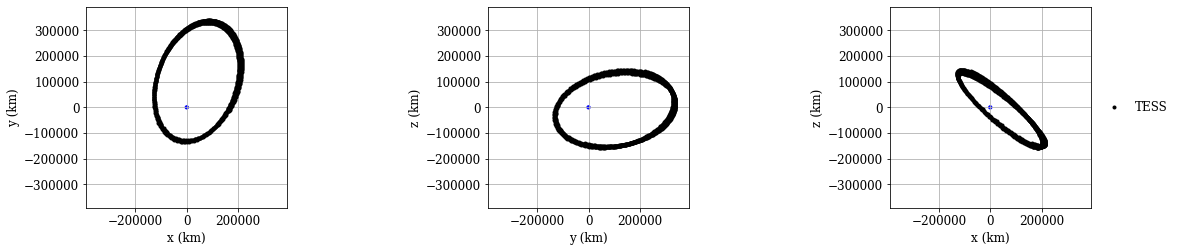

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the orbit over a 1 day period
arr.plot_satellite_orbits(tstart_mjd=mjd_now, tstop_mjd=mjd_now+50, npoints=1000);

In [13]:
# generate a synthetic observation with no noise
tstart = 0 # hr relative to im.mjd
tstop = 24*50 # hr relative to im.mjd
tadv = 1200 # s
tint = 1200
bw = 4.e9
obs = im.observe(arr,tint, tadv, tstart,tstop, bw, no_elevcut_space=True,  
                 dcal=True, ampcal=True, phasecal=True, add_th_noise=False)

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


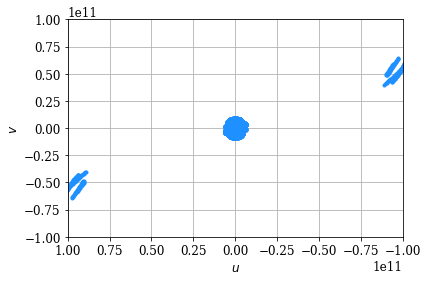

<Figure size 432x288 with 0 Axes>

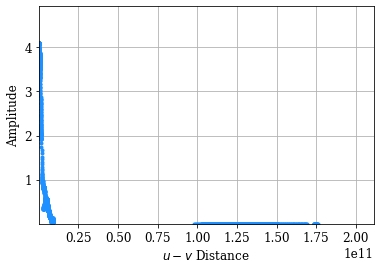

<Figure size 432x288 with 0 Axes>

In [14]:
# plot uv coverage and visamps
obs.plotall('u','v',conj=True, rangex=[1.e11,-1.e11],rangey=[-1.e11,1.e11]);
obs.plotall('uvdist','amp');

In [10]:
# replace TESS with a geosynchronous orbiter
arr2 = arr.remove_site('TESS')
arr2 = arr2.add_satellite_elements('GEO', 
                                   perigee_mjd=mjd_now,
                                   period_days=1,
                                   eccentricity=0,
                                   inclination=0,
                                   arg_perigee=0,
                                   long_ascending=0,
                                   sefd=10000)
arr2.ephem

{'GEO': [60053.91684552315, 1, 0, 0, 0, 0]}

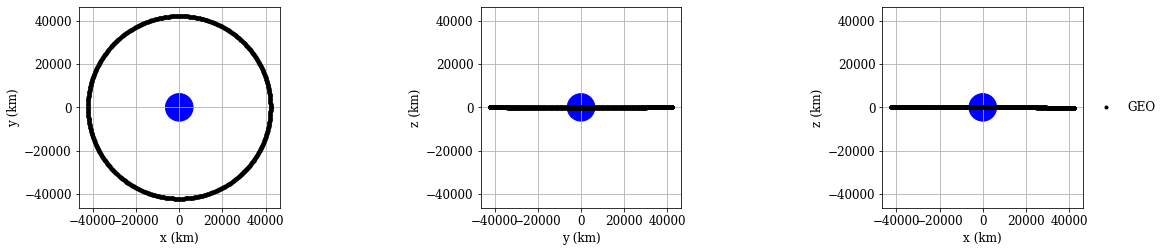

<Figure size 432x288 with 0 Axes>

In [11]:
# plot orbit
arr2.plot_satellite_orbits(tstart_mjd=mjd_now, tstop_mjd=mjd_now+1, npoints=1000);

In [12]:
# generate observation and plot
obs2 = im.observe(arr2,tint, tadv, tstart,tstop, bw, no_elevcut_space=True,  
                 dcal=True, ampcal=True, phasecal=True, add_th_noise=False)

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


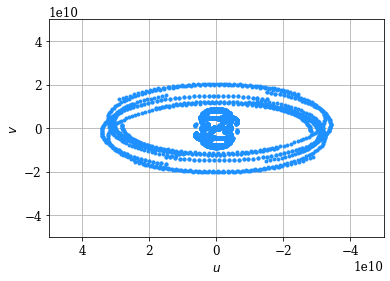

<Figure size 432x288 with 0 Axes>

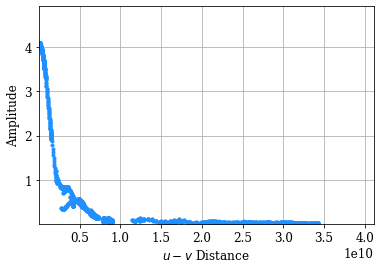

<Figure size 432x288 with 0 Axes>

In [20]:
# plot uv coverage and visamps
obs2.plotall('u','v',conj=True, rangex=[5.e10,-5.e10],rangey=[-5.e10,5.e10]);
obs2.plotall('uvdist','amp');

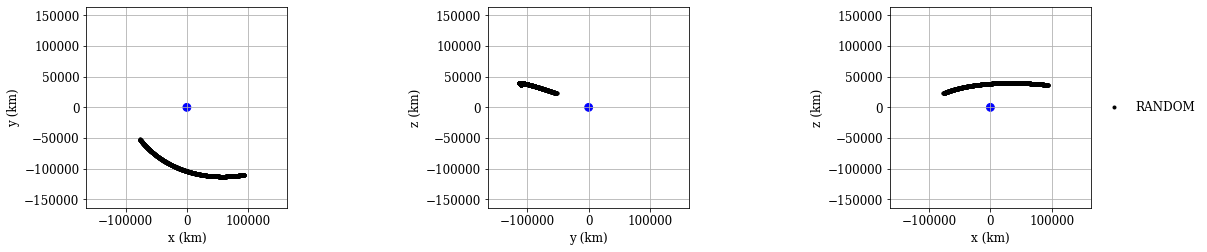

<Figure size 432x288 with 0 Axes>

In [14]:
# replace with a random elliptical orbiter
arr3 = arr2.remove_site('GEO')
arr3 = arr3.add_satellite_elements('RANDOM', 
                                   perigee_mjd=mjd_now-2,
                                   period_days=10.2,
                                   eccentricity=0.5,
                                   inclination=20.,
                                   arg_perigee=44.,
                                   long_ascending=172.,
                                   sefd=10000)
# plot orbit
arr3.plot_satellite_orbits(tstart_mjd=mjd_now, tstop_mjd=mjd_now+1, npoints=1000);

Generating empty observation file . . . 
Producing clean visibilities from image with nfft FT . . . 
Adding gain + phase errors to data and applying a priori calibration . . . 


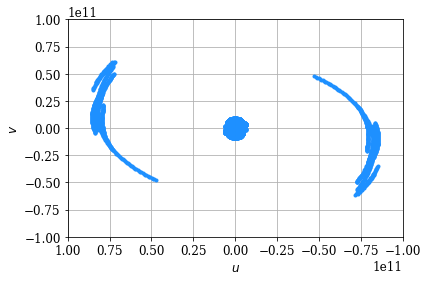

<Figure size 432x288 with 0 Axes>

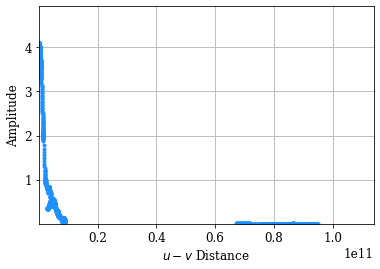

<Figure size 432x288 with 0 Axes>

In [15]:
# generate observation and plot
obs3 = im.observe(arr3,tint, tadv, tstart,tstop, bw, no_elevcut_space=True,  
                 dcal=True, ampcal=True, phasecal=True, add_th_noise=False)
obs3.plotall('u','v',conj=True, rangex=[1.e11,-1.e11],rangey=[-1.e11,1.e11]);
obs3.plotall('uvdist','amp');